# Analysis of the Iris Dataset

## Import required packages

In [1]:
# Working with multidimensional number arrays
import numpy as np
# Plotting
from matplotlib import pyplot as plt
# Working with dataframes
import pandas as pd
# AnchoredText helpts to add texts on a pyplot plots
from matplotlib.offsetbox import AnchoredText

## Summarise the features

### Load the Iris data set

In [2]:
# Load the iris dataset
# The iris.data file does not have a header, hence, header=None,
# otherwise, the first row will become a header.
df = pd.read_csv("iris.data", header=None)

# Check out the first five rows of the df
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Load the metadata of the Iris data set with 'with open()' function

If you only use open(), then you must use close() once you finished using a file. The file will stay open in a system and it will consume system's resources if you forget to specify close(). The method 'with open()' ensures that a file will be closed after its use to spare a system's resources.

*See ref on how to use 'with open()' to savely open and close files  
https://note.nkmk.me/en/python-file-io-open-with/*

In [3]:
# rt means to read a text file where r stands for read and t for text file
with open("iris.names", "rt") as file:
    content = file.read()
    print(content)

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

### Extracting the attribute information from the metadata file

In the code cell above, we opened the metadata file of the Iris data set and we found five attributes that correspond to five columns in the iris.data file, respectively: sepal length in cm, sepal width in cm, petal length in cm, petal width in cm and class. We will label the five columns of the Iris data set with those attributes.

In [4]:
# Create an object with features' names of numerical variables plus class of categorical variables
feature_names = ["sepal_length_(cm)", "sepal_width_(cm)", "petal_length_(cm)", "petal_width_(cm)"]
# Set the column names as feature names
df.columns = feature_names + ["class"]
# Check out the head of df
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Clean the df



In the code cell below, we will (1) check if the columns contains nan values and (2) we will clean class column that contains categorical variables about Iris dataset. 
1. We will replace missing values with appropriate information. We will replace missing numerical values with zero and remove samples that does not have class information. Firstly, pd.isna() outputs the df the same size as the input, although, the cells contain Boolean values. The cell becomes False if it does not contain nan, else, the cell becomes True if it does contain nan. This allows us to use .sum() function and see a broader picture if any of the column contains nan values. sum() considers True as the value 1 and False as the value 0, hence, we should see the total sum of 0 if the columns does not contain nan.
2. All values in the class column contains 'Iris-' prefix which is not necessary in this analysis. We already know that these samples comes from Iris genus and we can keep only a species name to keep only informative details of samples.

*See ref. on how to get the string variables of a pandas df column:  
https://note.nkmk.me/en/python-pandas-str-replace-strip-etc/*

In [5]:
# Check if columns do have nan values
pd.isna(df).sum()

sepal_length_(cm)    0
sepal_width_(cm)     0
petal_length_(cm)    0
petal_width_(cm)     0
class                0
dtype: int64

In [6]:
# Remove Iris- prefix from all values in the class column
df["class"] = df["class"].str.replace("Iris-", "")
# Show the head of df
df.head()

,sepal_length_(cm),sepal_width_(cm),petal_length_(cm),petal_width_(cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Calculate summary statistics

*Calculate mean, standard deviation, minima, maxima and median with numpy
https://numpy.org/doc/stable//reference/routines.statistics.html*

*Built-in python function round() to round numbers to a certain decimal point
https://docs.python.org/3/library/functions.html*

*Replace certain value in a string with another value
https://www.w3schools.com/python/ref_string_replace.asp*

*Create an empty numpy array
https://numpy.org/doc/2.1/reference/generated/numpy.empty.html*

*See ref. on how to access specific rows and columns in pandas df
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html*

*Function enumerate() allows to loop through an object while returning number of iterations
https://www.geeksforgeeks.org/enumerate-in-python/*

*Convert pandas df to numpy
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html*

*Transpose numpy array
https://numpy.org/doc/2.2/reference/generated/numpy.transpose.html*

In [7]:
# Define a function that computes summary statistics using the numpy
def summary_statistics(iris_data, feature_names):
    
    
    # Obtain the feature names
    feature_names = iris_data.columns
    
    # Convert pandas df to numpy array
    iris_data = iris_data.to_numpy()
    # Transpose the iris dataset to separate all values for each feature in a separate list
    iris_data = np.transpose(iris_data)
    
    
    # Create an empty pandas dataframe 
    df = pd.DataFrame(np.empty((4,5)))
    # Set the index of df as feature names
    df.index = feature_names
    # Set the column names of df 
    df.columns = ["mean", "std", "minima", "maxima", "median"]
    
    # Go through each feature in the iris_transposed
    # and calculate summary statistics
    # Use enumerate() function to loop through the object
    # enumerate() outputs the # of iterations and values from the object
    for count, feature in enumerate(iris_data):
        df.loc[feature_names[count], "mean"] = round(np.mean(feature), 2) # Compute mean
        df.loc[feature_names[count], "std"] = round(np.std(feature), 2) # Compute standard deviation
        df.loc[feature_names[count], "minima"] = round(np.min(feature), 2) # Compute the minimum
        df.loc[feature_names[count], "maxima"] = round(np.max(feature), 2) # Compute the maxima
        df.loc[feature_names[count], "median"] = round(np.median(feature), 2) # Compute the median

    return df

In [8]:
# Calculate summary statistics
sum_stats = summary_statistics(df.iloc[:,:4], feature_names)
# Display summary statistis
sum_stats

,mean,std,minima,maxima,median
sepal_length_(cm),5.84,0.83,4.3,7.9,5.80
sepal_width_(cm),3.05,0.43,2.0,4.4,3.00
petal_length_(cm),3.76,1.76,1.0,6.9,4.35
petal_width_(cm),1.20,0.76,0.1,2.5,1.30


### Save pandas df to a text file

*Convert pandas df to a text file  
https://saturncloud.io/blog/how-to-write-a-pandas-dataframe-to-a-txt-file/#:~:text=txt%20File-,To%20write%20a%20Pandas%20dataframe%20to%20a%20.,txt*

In [9]:
sum_stats.to_csv('sum_stats.txt', sep='\t', index=True)

## Plot histograms of the features

*See refs. for histogram plotting  
https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/ & https://matplotlib.org/stable/gallery/statistics/hist.html*

*String capitalisation  
https://www.w3schools.com/python/ref_string_capitalize.asp*

*Subplotting with matplotlib  
https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html#sphx-glr-users-explain-axes-constrainedlayout-guide-py*

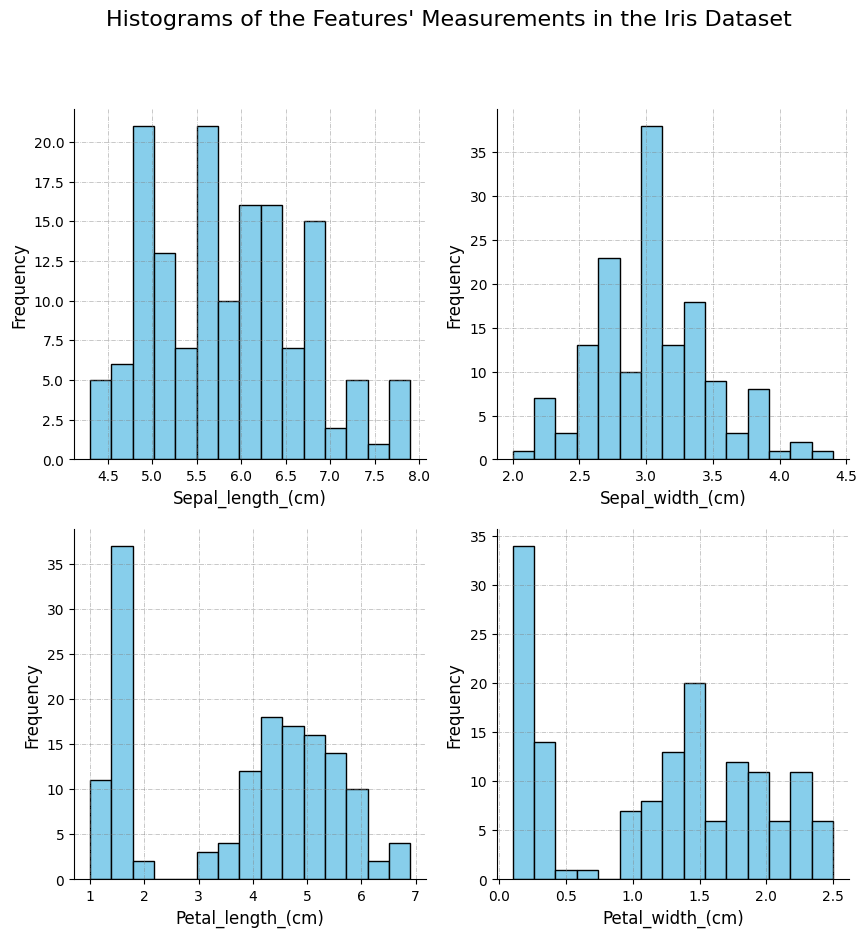

In [10]:
# Define a layout of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# Go through each axis in the previously defined layout 
# and plot a histogram of each feature
for count, ax in enumerate(axs.flat):
    
    # Remove axes splines 
    for s in ['top', 'right']: 
        ax.spines[s].set_visible(False) 
    
    # Add x, y gridlines 
    ax.grid(color ='grey', 
            linestyle ='-.', linewidth = 0.5, 
            alpha = 0.6) 

    # Plot a histogram of the feature
    ax.hist(df.iloc[:,count], bins=15, 
                    color='skyblue', edgecolor='black')
    
    # Set the names of x and y axis and title
    ax.set_xlabel(f"{feature_names[count].capitalize()}", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

# Set the title
fig.suptitle('Histograms of the Features\' Measurements in the Iris Dataset', fontsize=16)
# Save the plot
plt.savefig("histograms.png", dpi=300, bbox_inches = 'tight')
# Show the plot
plt.show()

## Plot scatter plots of all feature pairs 
In this section, we will plot scatter plots of each feature pair. The plots will also contain a regression line and an $R^{2}$ value to show proportion of variation in the dependent variable that is controlled by an independent variable.

### Calculate $R^{2}$

To calculate an $R^{2}$ we will use the following equation: $R^{2} = 1 - \frac{SS_{res}}{SS_{tot}} = 
\frac{\sum (y_{i} - \hat{y}_{i})^2}{\sum (y_{i} - \bar{y})^2}$, where $\hat{y}_{i}$ is a predicted y value at the $i_{th}$ instance and $\bar{y}$ is the mean of y (*see ref. https://www.youtube.com/watch?v=lng4ZgConCM&t=6s*). To get $\hat{y}_{i}$, we need to get the equation of a regression line (*see ref. https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-calculate-a-regression-line-169795/*).

The equation of a regression line is $\hat{y} = mx + b$. So far, we know only an x variable and we need to find the slope, m, and intercept, b, variables. The formula to get the slope is $m = r * \frac{y_{std}}{x_{std}}$, whereas, the formula to get the intercept of the regression line is $b = y_{mean} - m*x_{mean}$. It means that we must first find the correlation coefficient, r, before we can get the slope and the intercept. The formula for the correlation coefficient is: $ r=\frac{\sum (x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum (x_{i}-\bar{x})^{2} \sum (y_{i}-\bar{y})^{2}}}$ (*see ref. https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/strength-of-correlation.html*).

Hence, to find $R^{2}$, we need to complete these steps:
1. Find correlation coefficient, r.
2. Find the slope, m, of the regression line.
3. Find the intercept, b, of the regression line.
4. Lastly, find the $R^{2}$.

## Plot a regression line on the scatter plot
After we will get all required variables to calculate an $R^{2}$, then, we can get the cordinates of a regression line using the equation of a line, $y =m*x+b$, and plot it on the scatter plot.

### Define a function to calculate correlation coefficient, r

In [11]:
def find_r(df_x, df_y):
    
    # Calculate x and y means
    x_mean = sum(df_x) / len(df_x)
    y_mean = sum(df_y) / len(df_y)
    
    # Calculate the nominator
    nominator = sum([(x - x_mean)*(y - y_mean) for x, y in zip(df_x, df_y)])
    # Calculate the denominator
    denominator = (sum([(x - x_mean)**2 for x in df_x]) * sum([(y - y_mean)**2 for y in df_y]))**0.5
    # Calculate correlation coefficient
    r = (nominator / denominator)
    
    # Return correlation coefficient
    return r

### Define a function to calculate $R^{2}$

In [12]:
# Define a function to calculate R^2
def rsquared(df, x, y, sum_stats=sum_stats):
    
    
    # Define x variable
    df_x = df[x]
    # Define y variable
    df_y = df[y]
    
    
    # Calculate the mean and standard deviation of x and y 
    x_mean = sum(df_x) / len(df_x)
    y_mean = sum(df_y) / len(df_y)
    x_std = (sum([(x - x_mean)**2 for x in df_x])/(len(df_x)-1))**0.5
    y_std = (sum([(y - y_mean)**2 for y in df_y])/(len(df_y)-1))**0.5
    
    
    # Calculate correlation coefficient, r
    r = find_r(df_x,df_y)
    
    # Find the slope of the regression line, m
    m = r * (y_std / x_std)

    # Find the intercept of the regression line, b
    b = y_mean - m*x_mean
    
    
    # Get the Residual Sum of Squares
    SE_line = 0
    for i in range(len(x)):
        SE_line += (df_y[i] - (m*df_x[i] + b))**2
    
    
    # Get the Total Sum of Squares
    SE = 0
    for i in range(len(y)):
        SE += (df_y[i] - y_mean)**2
    
    
    # Use the formula above to calculate R^2
    r_squared = 1 - (SE_line / SE)
    
    return round(r_squared, 2) # Round R^2 to two decimal places

### Define a function to plot a regression line

The function below generates cordinates of a regression line given the sets of x and y data points. The formula for a line is $y=m*x+b$. To find y cordinates of a regression line, we need to find m and b variables and plug in any x value in the equation. We will use the formulas defined above to get m and b variables. Then, we will generate a range of xs values and plug them in into the equation one by one to get corresponding y values. These xs and ys values will represent the cordinates of a regression line of x and data sets.

*Calculate standard deviation  
https://www.investopedia.com/terms/s/standarddeviation.asp*

In [13]:
def regression_line(df_x, df_y):
    
    # Calculate x and y means
    x_mean = sum(df_x) / len(df_x)
    y_mean = sum(df_y) / len(df_y)
    x_std = (sum([(x - x_mean)**2 for x in df_x])/(len(df_x)-1))**0.5
    y_std = (sum([(y - y_mean)**2 for y in df_y])/(len(df_y)-1))**0.5
    
    # Find the slope, m
    m = find_r(df_x, df_y) * (y_std/x_std)
    # Find the intercept, b
    b = y_mean - m * x_mean
    
    # Generate a range of x values
    xs = np.linspace(min(df_x), max(df_x), num=100)
    # Calculate y cordinates using the equation of a line
    y_hats = [(x*m + b) for x in xs]
    
    # Return x and y cordinates of a regression line
    return xs, y_hats

### Define a function to plot a scatter plot

*Set a suptitle for a main figure  
https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots*

*Set a legend for a figure  
https://stackoverflow.com/questions/74021364/how-to-use-legend-only-once-in-a-subplot-for-a-for-loop*

*Change the size of a figure  
https://stackoverflow.com/questions/7125009/how-to-change-legend-fontsize-with-matplotlib-pyplot*

*numpy.plofit() function  
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html*

*Create a polynomial numpy matrix  
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html*

*Anchored text  
https://stackoverflow.com/questions/7045729/automatically-position-text-box-in-plot*

In [14]:
def plot_scatter(df, ax, feature1, feature2):
    
    #---- Step 1.
    """"Plot a scatter plot of a feature pair. 
    In this step, we will use a foor loop to plot a only a single 
    class samples on the axes through each iteration. 
    This allows to colour code data points based by class and use a 
    function to automatically create a legend for a plot."""
    
    # Plot three scatter plots for each type
    for name in df["class"].unique():

        # Create a temporary df with details for a single type 
        temp_df = df[df["class"] == name]

        # Select x and y cordinates as petal length and width, resptectively
        x = temp_df[feature1]
        y = temp_df[feature2]

        # Plot a scatter plot with previously defined cordinates and
        # use type name as the label of the legend
        ax.scatter(x, y, label=name)

    #---- Step 2. Plot a regression line on the axis.
    # Get the x and y cordinates for a regression line
    xs, y_hats = regression_line(df[feature1], df[feature2])
    # Plot a regression line
    ax.plot(xs, y_hats, color="red")

    #---- Step 3. Calculate R^2 and add it to the scatter plot.
    # Calculate an R^2
    r_squared = rsquared(df, feature1, feature2)
    
    
    # Add the text inside the plot which is R^2 value defined above
    anchored_text = AnchoredText(f"$R^{2}$={r_squared}", loc=2)
    ax.add_artist(anchored_text)
    
    #---- Step 4. Add the x and y axes names
    # Define the name of the first feature
    # Replace underscore with space and capitalise the first letter
    feature1_name = feature1.replace("_", " ").capitalize()
    # Define the name of the second feature
    # Replace underscore with space and capitalise the first letter
    feature2_name = feature2.replace("_", " ").capitalize()
   
    # Name x and y axes
    ax.set_xlabel(feature1_name)
    ax.set_ylabel(feature2_name)

### Plot scatter plots of the features

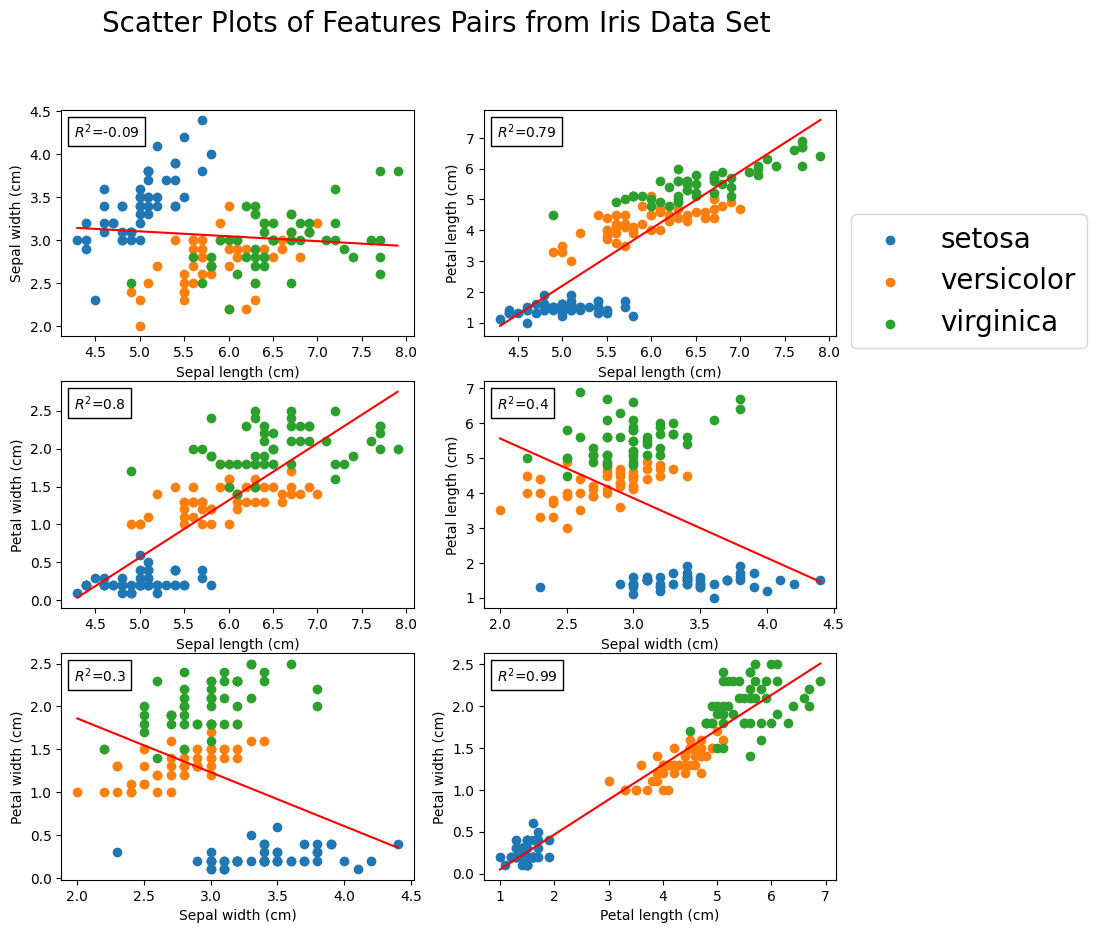

In [15]:
#---- Step 1.
""""
To have all scatter plots on the same figure, we will create a subplot 
layout with 6 axes for each feature pair. This step returns two items, 
fig and axs, where fig stands for a figure and axs stands for 6 axs. 
If we want to modify global view of the figure, then we have to use a fig object, 
else, use axs object to edit the axes."""

# Define a layout of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))


#---- Step 2.
# Use a for loop to go through each axis in the axs object and plot a scatter plot.
# Flatten out the axs object
axs = axs.flat

# We will use count to track the # of scatter plots and used axes
count = 0

# Define features names
features = df.iloc[:,:4].columns

# Go through each axis in the previously defined layout 
# and plot a scatter plot of the feature pair.
for i in range(len(features) - 1):
    plot_scatter(df, axs[count], features[i], features[i+1])
    # add one after using an axis
    count += 1
    
    # Checks if i+2 is not larger than 3,
    # else, it plots the feature pair i and i+2
    if i+2 < 4:
        plot_scatter(df, axs[count], features[i], features[i+2])
        # add one after using an axis
        count += 1
        
    # Checks if i+3 is not larger than 3,
    # else, it plots the feature pair i and i+3
    if i+3 < 4:
        plot_scatter(df, axs[count], features[i], features[i+3])
        # add one after using an axis
        count += 1

#---- Step 3.
# Define the fine details of a figure such as legend and title.
# Set the legend of the figure
# df["class"].unique() gives the names of the three Iris classes
plt.legend(df["class"].unique(), bbox_to_anchor=(1.75, 3), ncol=1, prop={'size': 20})
# Set the title of a figure
fig.suptitle("Scatter Plots of Features Pairs from Iris Data Set", fontsize=20)
# Save the figure
plt.savefig("scatter_plots.png", dpi=300, bbox_inches = 'tight')
# Show the figure
plt.show()

## Calculating correlation matrix with inherented pandas df function corr()

In [16]:
# Exclude columns in a pandas df  
# https://www.geeksforgeeks.org/how-to-exclude-columns-in-pandas/ 

# Calculate the correlation matrix  
# https://stackoverflow.com/questions/39409866/correlation-heatmap  

corr = df.drop(columns=["class"]).corr()

In [17]:
# Round the numbers in numpy array  
# https://www.programiz.com/python-programming/numpy/methods/round 

corr = np.array(corr)
corr = np.round(corr, 2)

## Fill diagonal and upper half with NaNs

The upper and the bottom right and left corners, respectively, of the correlation matrix are the mirror representation of each other. They give the same information. Therefore, we need to see only a one of them in the graph to exclude redundant information and make the plot easy to read. Therefore, here I will fill the upper right top triangle of the correlation matrix with nan values so that the upper right portion of the correlation matrix graph would be empty. 

In [18]:
# Create a numpy array, with zero values, of the same size as the input  
# https://numpy.org/doc/2.2/reference/generated/numpy.zeros_like.html  
mask = np.zeros_like(corr, dtype=bool)

# Set the numbers of right-upper triangle of a numpy array to a certain value  
# https://numpy.org/doc/2.1/reference/generated/numpy.triu_indices_from.html  
mask[np.triu_indices_from(mask, k=1)] = True
corr[mask] = np.nan

## Plot the correlation matrix

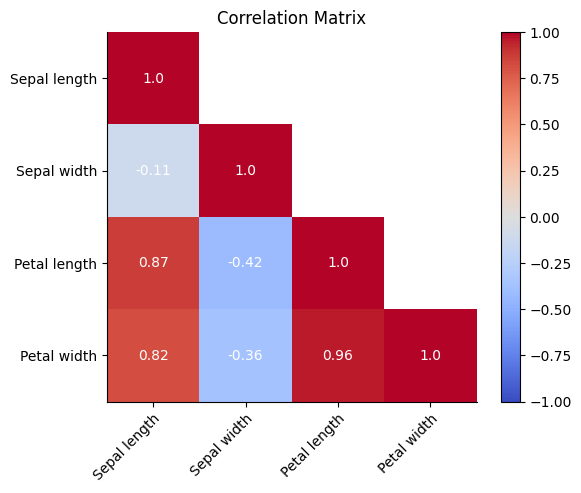

In [19]:
# Setting up the color bar  
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html  
# Examples of a color palette  
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
# Example on how to remove the spines of a figure
# https://www.statology.org/matplotlib-remove-frame/

# Initialize the figure first so you could remove the spines
# If you will try to remove spines without initialising a figure
# it won't figure on the first run of a cell but it will only
# work on the following attempts when the figure is initialised
# on the first attempt.
plt.figure()
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

# Set the minimum and maximum values in a colour bar
vmax = 1
vmin = -1
# Create a pseudocolour image
cax = plt.imshow(corr, cmap="coolwarm", vmin=vmin, vmax=vmax)

# Add a colorbar 
cbar = plt.colorbar(cax)


# Get the feature names from the iris.feature_names
# Replace (cm) with empty string and capitalise the string
features = [feature.replace("_(cm)", "").replace("_", " ").capitalize() for feature in features]


# Show all ticks and label them with the respective list entries
plt.xticks(range(len(features)), labels=features,
               rotation=45, ha="right", rotation_mode="anchor")
plt.yticks(range(len(features)), labels=features)


# Loop over data dimensionss and create text annotations.
for i in range(len(features)):
    for j in range(len(features)):
        text = plt.text(j, i, corr[i, j],
                       ha="center", va="center", color="w")
        


# Set the title
plt.title("Correlation Matrix")
plt.savefig("features_correlation_plot.png", dpi=300, bbox_inches = 'tight')
# # Show the plot
plt.show()